# UFC Fight Predction Project (Michael and Shayan)

### Importing and Cleaning the Data

In [1]:
import pandas as pd                  # Pandas
import numpy as np                   # Numpy
from matplotlib import pyplot as plt # Matplotlib

# Package to implement Random Forest
import sklearn
from sklearn.ensemble import RandomForestClassifier

# Package to implement Grid Search Cross Validation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold 

# Package for generating confusion matrix
from sklearn.metrics import plot_confusion_matrix

# Package for generating classification report
from sklearn.metrics import classification_report

# Package to record time
import time

# Package for Data pretty printer
from pprint import pprint

%matplotlib inline

In [2]:
ufc_df = pd.read_csv('filtered_ufc.csv')
ufc_df.head()

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,...,finish_details,finish_round,finish_round_time,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
0,Alexander Hernandez,Mike Breeden,-675.0,475,14.814815,475.000000,44471,"Las Vegas, Nevada, USA",USA,Red,...,Punch,1.0,0.055556,80.0,175.0,900.0,500.0,3500.0,110.0,1100.0
1,Joe Solecki,Jared Gordon,-135.0,115,74.074074,115.000000,44471,"Las Vegas, Nevada, USA",USA,Blue,...,NaN,3.0,0.208333,900.0,165.0,200.0,400.0,1200.0,900.0,600.0
2,Devonte Smith,Jamie Mullarkey,-155.0,135,64.516129,135.000000,44471,"Las Vegas, Nevada, USA",USA,Blue,...,Punches,2.0,0.118750,471.0,330.0,450.0,2000.0,900.0,140.0,330.0
3,Dan Hooker,Nasrat Haqparast,-150.0,130,66.666667,130.000000,44464,"Las Vegas, Nevada, USA",USA,Red,...,NaN,3.0,0.208333,900.0,225.0,350.0,900.0,2200.0,225.0,350.0
4,Uros Medic,Jalin Turner,-115.0,-105,86.956522,95.238095,44464,"Las Vegas, Nevada, USA",USA,Blue,...,Rear Naked Choke,1.0,0.167361,241.0,400.0,400.0,1200.0,700.0,165.0,300.0


In [3]:
X = ufc_df.drop(columns=['Winner'])
y = ufc_df['Winner']

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=1)

classifier = RandomForestClassifier(random_state = 1)

In [4]:
ufc_df = ufc_df.drop(['R_fighter','B_fighter','date','location','country','weight_class','gender','finish','finish_details'], axis = 1)
ufc_df = ufc_df.drop(['B_match_weightclass_rank','R_match_weightclass_rank','R_Lightweight_rank','R_Pound-for-Pound_rank','B_Lightweight_rank','B_Pound-for-Pound_rank'], axis = 1)


ufc_df




,R_odds,B_odds,R_ev,B_ev,Winner,title_bout,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,...,better_rank,finish_round,finish_round_time,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
0,-675.0,475,14.814815,475.000000,Red,False,3,1,0,0,...,neither,1.0,0.055556,80.0,175.0,900.0,500.0,3500.0,110.0,1100.0
1,-135.0,115,74.074074,115.000000,Blue,False,3,0,2,0,...,neither,3.0,0.208333,900.0,165.0,200.0,400.0,1200.0,900.0,600.0
2,-155.0,135,64.516129,135.000000,Blue,False,3,0,1,0,...,neither,2.0,0.118750,471.0,330.0,450.0,2000.0,900.0,140.0,330.0
3,-150.0,130,66.666667,130.000000,Red,False,3,0,2,0,...,Red,3.0,0.208333,900.0,225.0,350.0,900.0,2200.0,225.0,350.0
4,-115.0,-105,86.956522,95.238095,Blue,False,3,0,2,0,...,neither,1.0,0.167361,241.0,400.0,400.0,1200.0,700.0,165.0,300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,270.0,-330,270.000000,30.303030,Blue,False,3,0,1,0,...,neither,1.0,0.175694,253.0,NaN,NaN,NaN,NaN,NaN,NaN
851,-210.0,190,47.619048,190.000000,Red,False,3,1,0,0,...,neither,2.0,0.180556,560.0,NaN,NaN,NaN,NaN,NaN,NaN
852,-320.0,290,31.250000,290.000000,Red,False,3,0,3,0,...,neither,3.0,0.208333,900.0,NaN,NaN,NaN,NaN,NaN,NaN
853,-420.0,335,23.809524,335.000000,Red,False,3,1,0,0,...,neither,2.0,0.152778,520.0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
ufc_df['Winner'].replace(['Red', 'Blue'], [0, 1], inplace=True)
ufc_df['B_Stance'].replace(['Orthodox', 'Southpaw','Switch','Switch '], [0, 1, 2, 2], inplace=True)
ufc_df['R_Stance'].replace(['Orthodox', 'Southpaw','Switch','Switch '], [0, 1, 2, 2], inplace=True)
ufc_df['better_rank'].replace(['Red', 'Blue', 'neither'], [0, 1,2], inplace=True)

ufc_df

,R_odds,B_odds,R_ev,B_ev,Winner,title_bout,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,...,better_rank,finish_round,finish_round_time,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
0,-675.0,475,14.814815,475.000000,0,False,3,1,0,0,...,2,1.0,0.055556,80.0,175.0,900.0,500.0,3500.0,110.0,1100.0
1,-135.0,115,74.074074,115.000000,1,False,3,0,2,0,...,2,3.0,0.208333,900.0,165.0,200.0,400.0,1200.0,900.0,600.0
2,-155.0,135,64.516129,135.000000,1,False,3,0,1,0,...,2,2.0,0.118750,471.0,330.0,450.0,2000.0,900.0,140.0,330.0
3,-150.0,130,66.666667,130.000000,0,False,3,0,2,0,...,0,3.0,0.208333,900.0,225.0,350.0,900.0,2200.0,225.0,350.0
4,-115.0,-105,86.956522,95.238095,1,False,3,0,2,0,...,2,1.0,0.167361,241.0,400.0,400.0,1200.0,700.0,165.0,300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,270.0,-330,270.000000,30.303030,1,False,3,0,1,0,...,2,1.0,0.175694,253.0,NaN,NaN,NaN,NaN,NaN,NaN
851,-210.0,190,47.619048,190.000000,0,False,3,1,0,0,...,2,2.0,0.180556,560.0,NaN,NaN,NaN,NaN,NaN,NaN
852,-320.0,290,31.250000,290.000000,0,False,3,0,3,0,...,2,3.0,0.208333,900.0,NaN,NaN,NaN,NaN,NaN,NaN
853,-420.0,335,23.809524,335.000000,0,False,3,1,0,0,...,2,2.0,0.152778,520.0,NaN,NaN,NaN,NaN,NaN,NaN


# Testing Methods

### Decision Trees

In [6]:
# Package to implement Decision Tree Model
import sklearn
from sklearn.tree import DecisionTreeClassifier

# Package to implement Grid Search Cross Validation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.model_selection import KFold 

# Package to visualize Decision Tree
from sklearn import tree

# Package for generating confusion matrix
from sklearn.metrics import plot_confusion_matrix

# Package for generating classification report
from sklearn.metrics import classification_report

ufc_df = ufc_df.dropna()
ufc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478 entries, 0 to 722
Data columns (total 82 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   R_odds                        478 non-null    float64
 1   B_odds                        478 non-null    int64  
 2   R_ev                          478 non-null    float64
 3   B_ev                          478 non-null    float64
 4   Winner                        478 non-null    int64  
 5   title_bout                    478 non-null    bool   
 6   no_of_rounds                  478 non-null    int64  
 7   B_current_lose_streak         478 non-null    int64  
 8   B_current_win_streak          478 non-null    int64  
 9   B_draw                        478 non-null    int64  
 10  B_avg_SIG_STR_landed          478 non-null    float64
 11  B_avg_SIG_STR_pct             478 non-null    float64
 12  B_avg_SUB_ATT                 478 non-null    float64
 13  B_avg

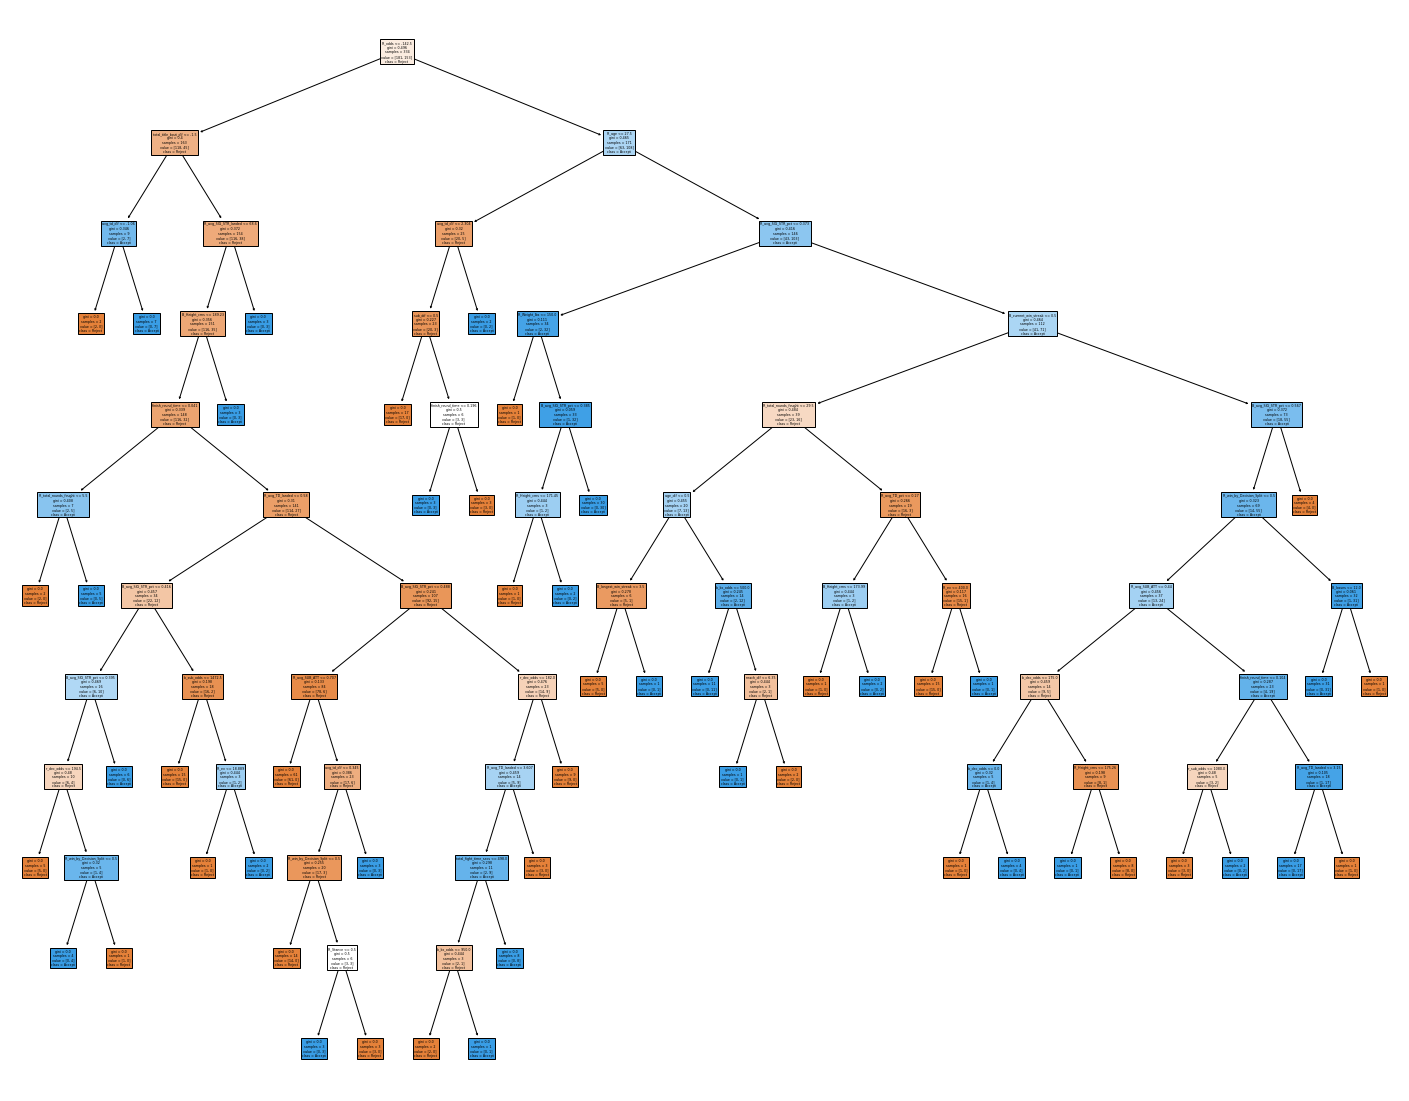

In [7]:
# Step 1: Selecting data correponding to Input Features X and Outcome y
X = ufc_df.drop(columns=['Winner'])
y = ufc_df['Winner']


# Step 2: Data Partitioning into train and test sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=1)


# Step3: Fitting Decision Tree Model on Train Set
clf = DecisionTreeClassifier(random_state = 1)
clf.fit(train_X, train_y)


# Step 4: Visualizing Decision Tree
fig = plt.figure(figsize=(25,20))
a = tree.plot_tree(decision_tree = clf,
                   max_depth = None,
                   feature_names = train_X.columns,
                   class_names=['Reject', "Accept"],
                   filled = True)

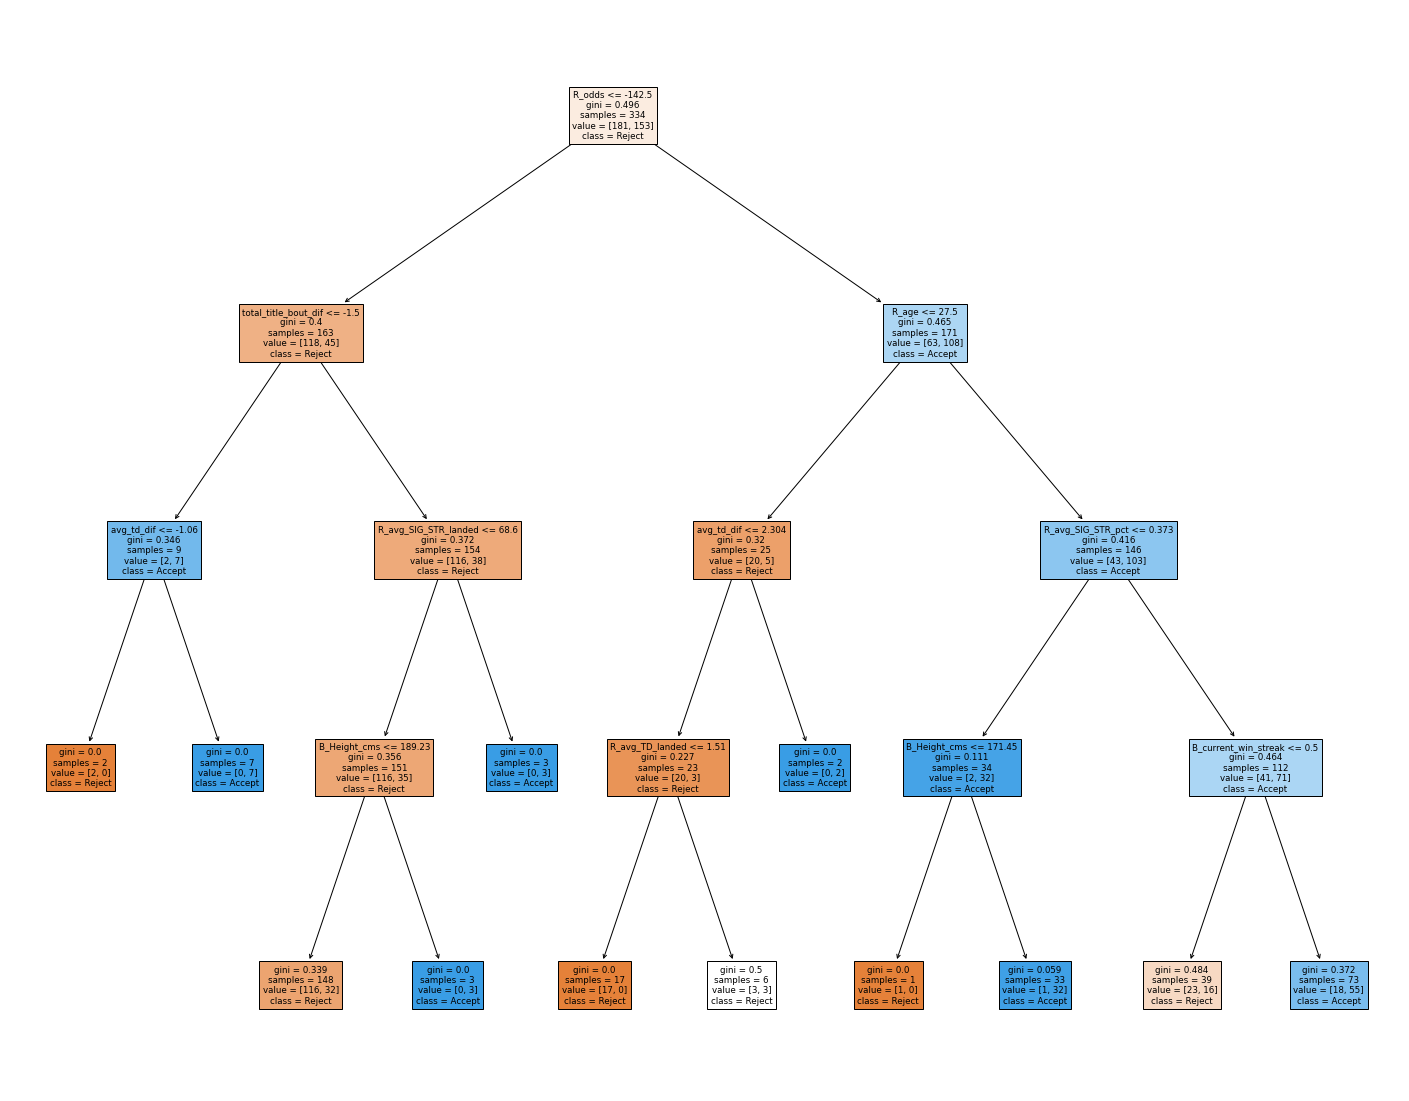

In [8]:
# Changing max_depth
# Fitting Decision Tree Model on Train Set
clf = DecisionTreeClassifier(max_depth = 4, random_state = 1)
clf.fit(train_X, train_y)


# Visualizing Decision Tree
fig = plt.figure(figsize=(25,20))
a = tree.plot_tree(decision_tree = clf,
                   feature_names = train_X.columns,
                   class_names=['Reject', "Accept"],
                   filled = True)

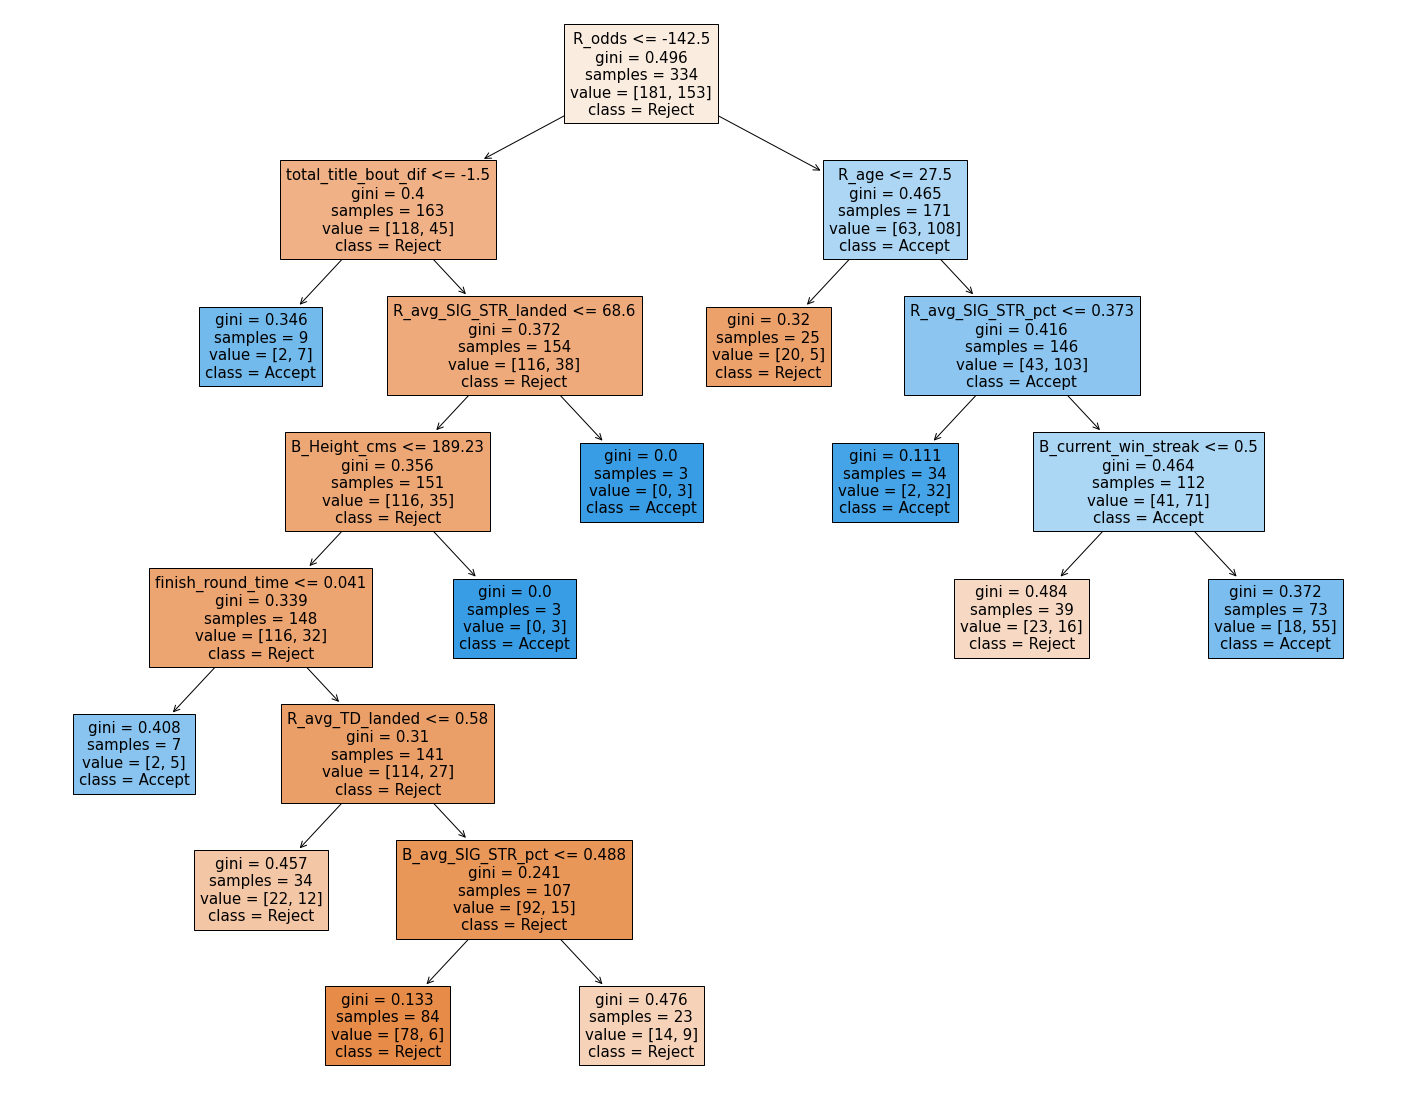

In [9]:
# Changing min_samples_split
# Fitting Decision Tree Model on Train Set
clf = DecisionTreeClassifier(min_samples_split = 100, random_state = 1)
clf.fit(train_X, train_y)


# Visualizing Decision Tree
fig = plt.figure(figsize=(25,20))
a = tree.plot_tree(decision_tree = clf,
                   feature_names = train_X.columns,
                   class_names=['Reject', "Accept"],
                   filled = True)

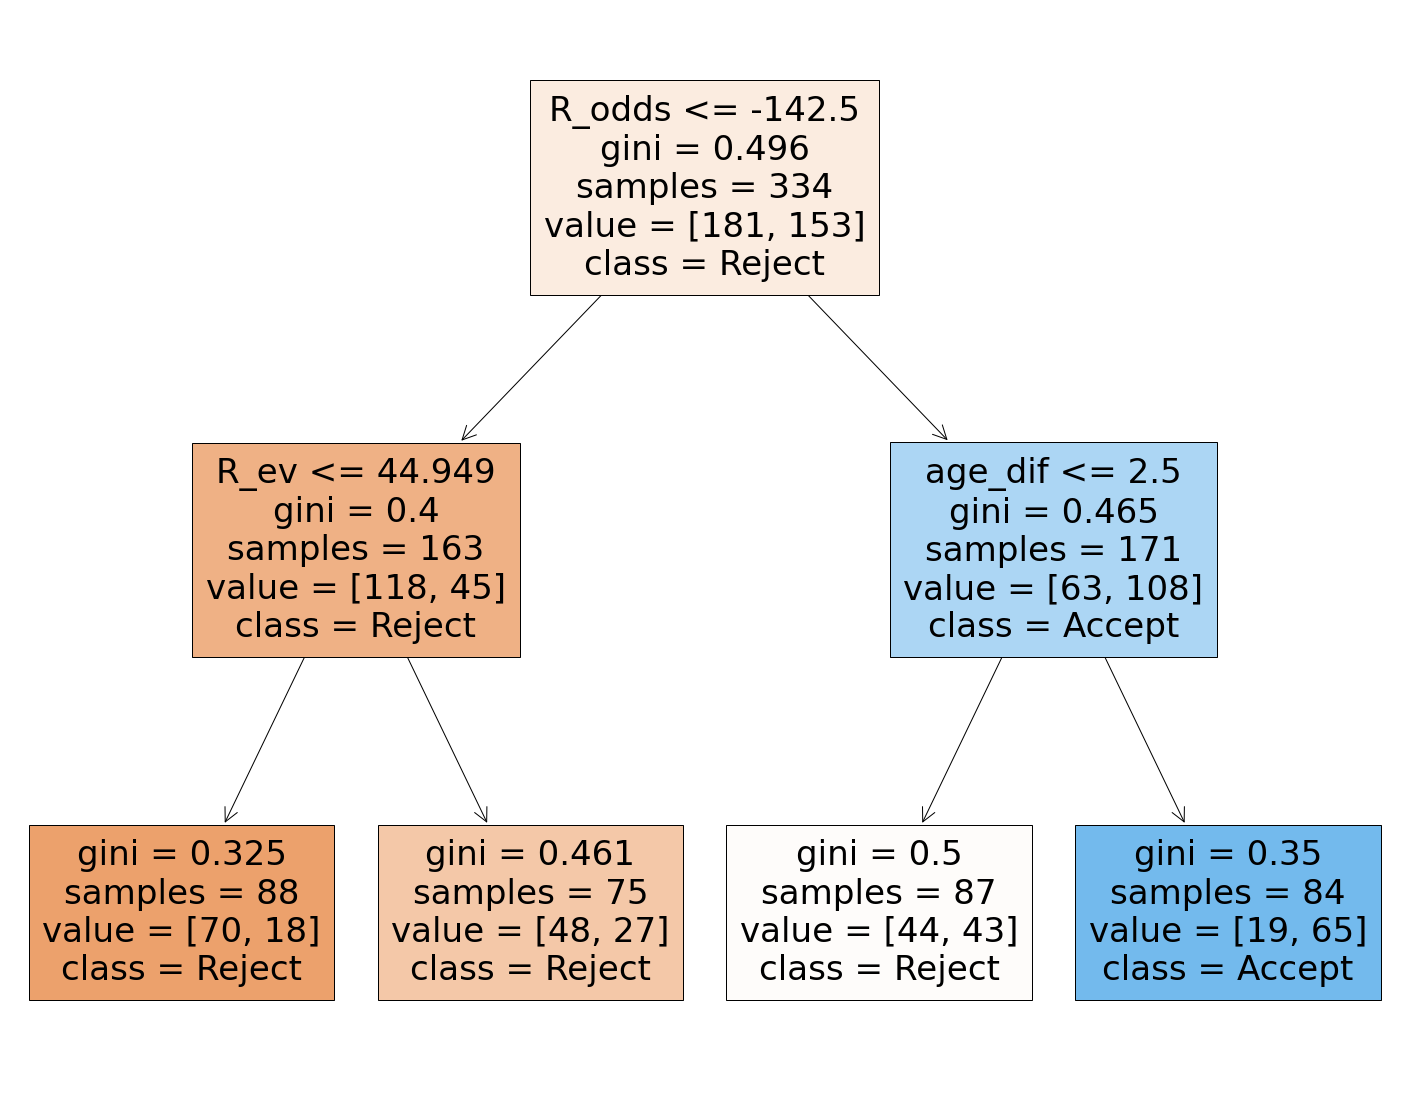

In [10]:
# Changing min_samples_leaf
# Fitting Decision Tree Model on Train Set
clf = DecisionTreeClassifier(min_samples_leaf = 75, random_state = 1)
clf.fit(train_X, train_y)


# Visualizing Decision Tree
fig = plt.figure(figsize=(25,20))
a = tree.plot_tree(decision_tree = clf,
                   feature_names = train_X.columns,
                   class_names=['Reject', "Accept"],
                   filled = True)

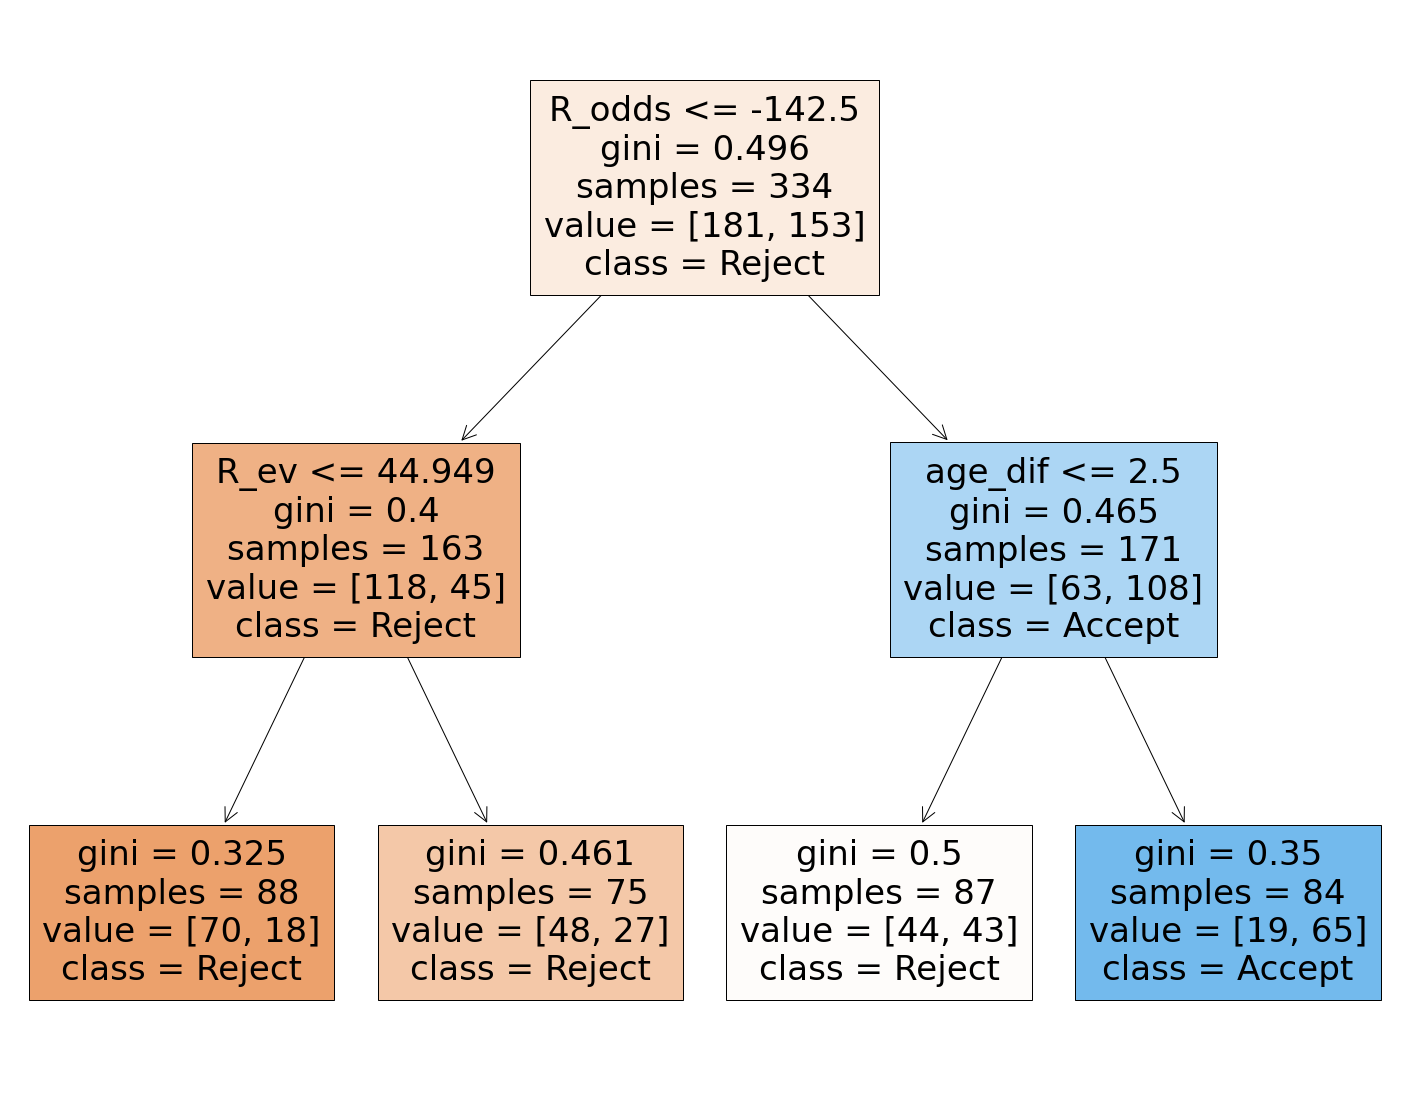

In [11]:
# Changing min_samples_leaf
# Fitting Decision Tree Model on Train Set
clf = DecisionTreeClassifier(min_samples_leaf = 75, random_state = 1)
clf.fit(train_X, train_y)


# Visualizing Decision Tree
fig = plt.figure(figsize=(25,20))
a = tree.plot_tree(decision_tree = clf,
                   feature_names = train_X.columns,
                   class_names=['Reject', "Accept"],
                   filled = True)

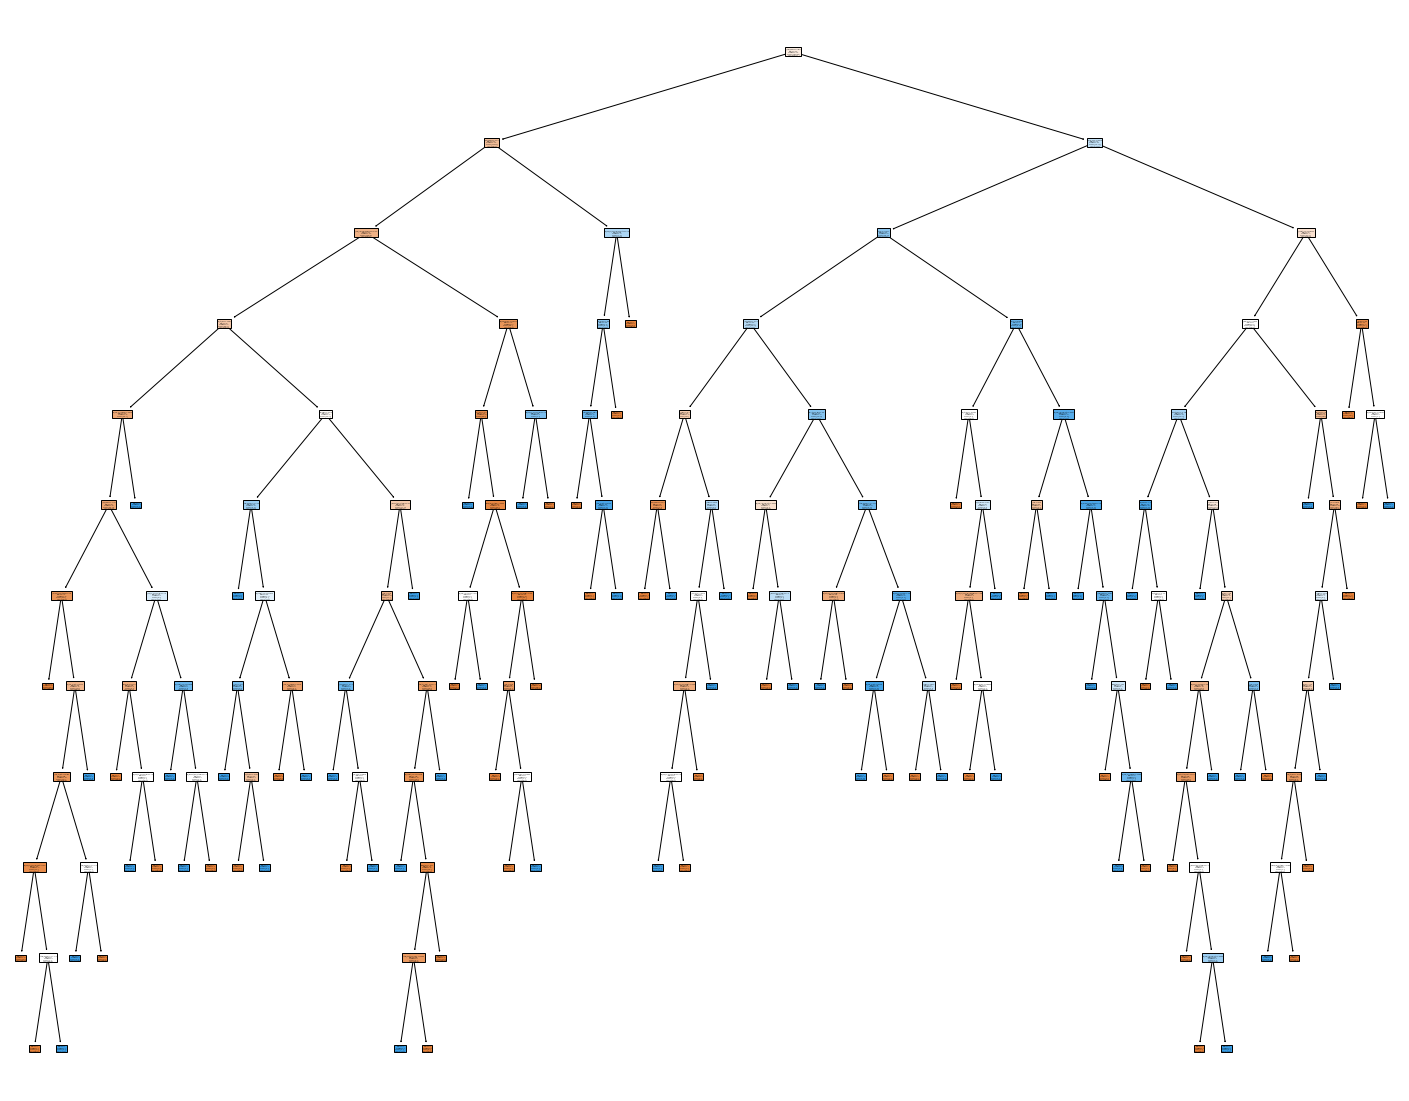

In [12]:
# Changing max_features
# Fitting Decision Tree Model on Train Set
clf = DecisionTreeClassifier(max_features = 5, random_state = 1)
clf.fit(train_X, train_y)


# Visualizing Decision Tree
fig = plt.figure(figsize=(25,20))
a = tree.plot_tree(decision_tree = clf,
                   feature_names = train_X.columns,
                   class_names=['Reject', "Accept"],
                   filled = True)

In [13]:
# Define your model
classifier = DecisionTreeClassifier(random_state = 1)
# Start with an initial guess for parameters
hyper_params = {
    'max_depth': [10, 20, 30, 40], 
    'min_samples_split': [20, 40, 60], 
    'min_samples_leaf': [10, 20, 30, 40, 100]
}

# Creating folds
folds = KFold(n_splits = 5, shuffle = True, random_state = 1)

# Call GridSearchCV()
model_cv = GridSearchCV(estimator = classifier, 
                        param_grid = hyper_params, 
                        scoring= 'f1_weighted', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs = -1) # Will utilize all available CPUs 

In [14]:
# Fit the model
model_cv.fit(train_X, train_y)  

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    4.1s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40],
                         'min_samples_leaf': [10, 20, 30, 40, 100],
                         'min_samples_split': [20, 40, 60]},
             scoring='f1_weighted', verbose=1)

In [15]:
print('Initial score: ', model_cv.best_score_)
print('Initial parameters: ', model_cv.best_params_)

Initial score:  0.638078991779991
Initial parameters:  {'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 20}


In [16]:
# Adapt grid based on result from initial grid search
hyper_params_new = {
    'max_depth': list(range(2, 20)), 
    'min_samples_split': list(range(90, 130)), 
    'min_samples_leaf': list(range(15, 25))
}

# Call GridSearchCV()
model_cv = GridSearchCV(estimator = classifier, 
                        param_grid = hyper_params_new, 
                        scoring= 'f1_weighted', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs = -1) # Will utilize all available CPUs 

In [17]:
# Fit the model
model_cv.fit(train_X, train_y)  

Fitting 5 folds for each of 7200 candidates, totalling 36000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 1000 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 3000 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 5800 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done 9400 tasks      | elapsed:   24.7s
[Parallel(n_jobs=-1)]: Done 13800 tasks      | elapsed:   36.3s
[Parallel(n_jobs=-1)]: Done 19000 tasks      | elapsed:   50.3s
[Parallel(n_jobs=-1)]: Done 25000 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 31800 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 35977 out of 36000 | elapsed:  1.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 36000 out of 36000 | elapsed:  1.6min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [15, 16, 17, 18, 19, 20, 21, 22,
                                              23, 24],
                         'min_samples_split': [90, 91, 92, 93, 94, 95, 96, 97,
                                               98, 99, 100, 101, 102, 103, 104,
                                               105, 106, 107, 108, 109, 110,
                                               111, 112, 113, 114, 115, 116,
                                               117, 118, 119, ...]},
             scoring='f1_weighted', verbose=1)

In [18]:
print('Improved score: ', model_cv.best_score_)
print('Improved parameters: ', model_cv.best_params_)

Improved score:  0.6476664909787031
Improved parameters:  {'max_depth': 3, 'min_samples_leaf': 17, 'min_samples_split': 117}


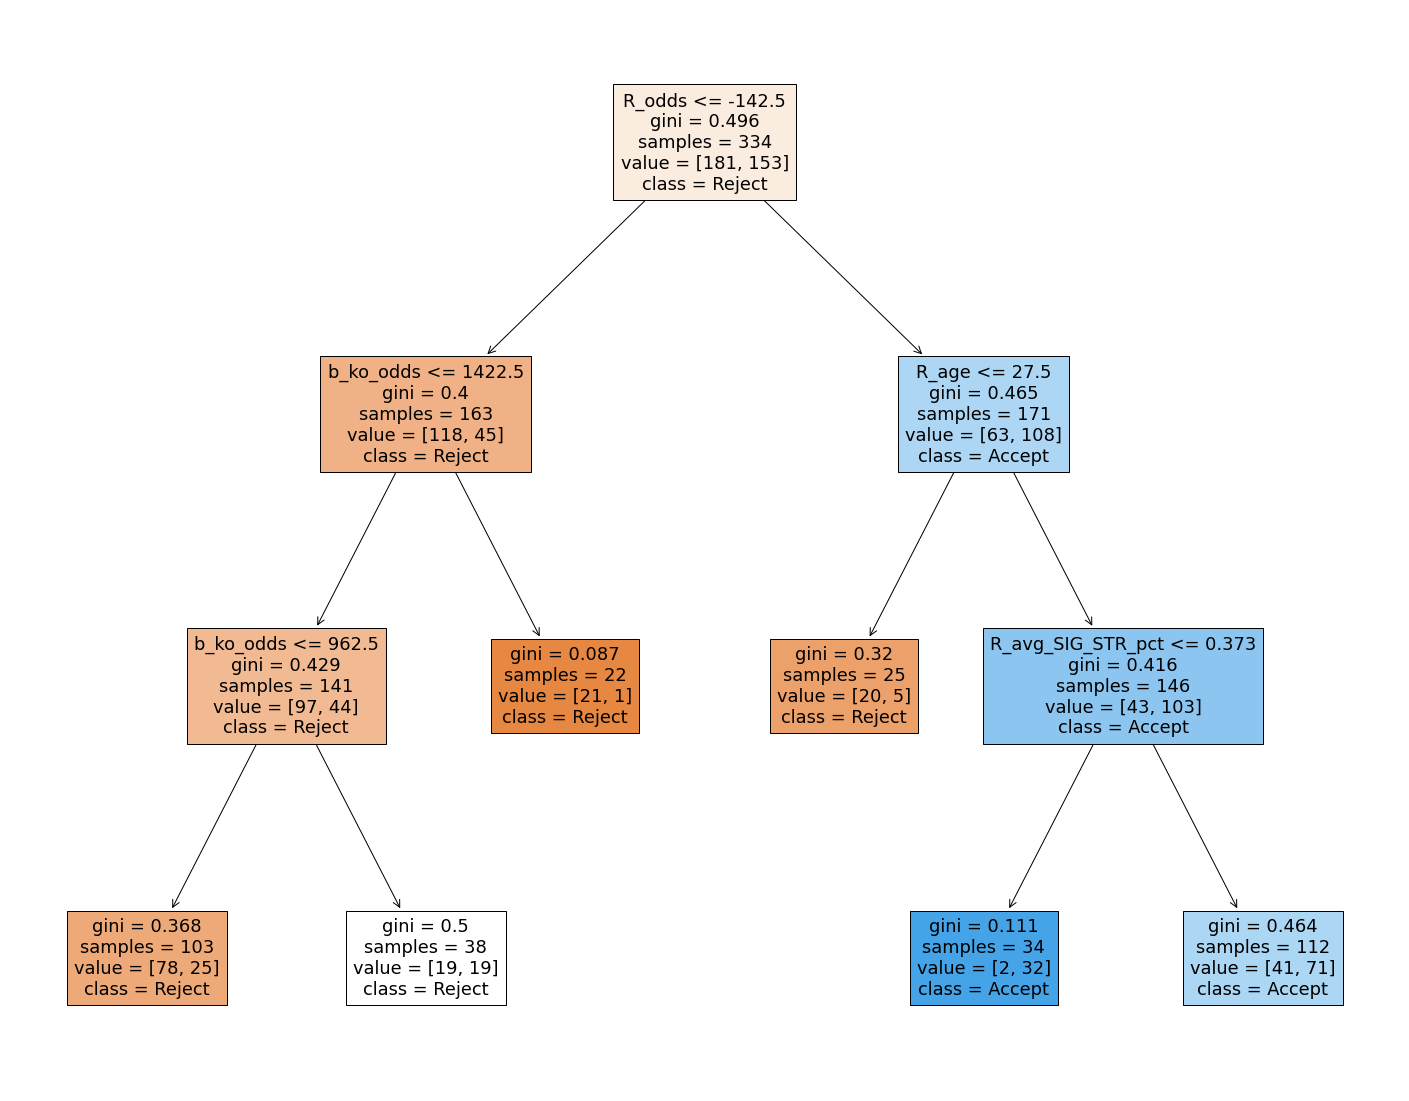

In [19]:
# Storing best model
bestClassTree = model_cv.best_estimator_

# Visualizing Decision Tree
fig = plt.figure(figsize=(25,20))
a = tree.plot_tree(decision_tree = bestClassTree,
                   feature_names = train_X.columns,
                   class_names=['Reject', "Accept"],
                   filled = True)

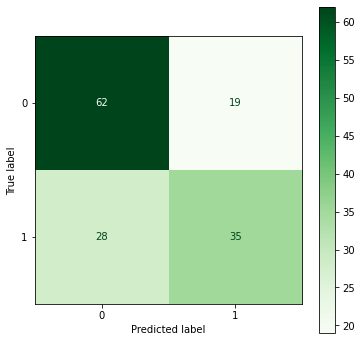

In [20]:
# Specifying figure size
fig, ax = plt.subplots(figsize=(6, 6)) 

# Generating confusion matrix
plot_confusion_matrix(model_cv, test_X, test_y,
                      cmap = plt.cm.Greens,
                      values_format = '',
                      ax = ax);

In [21]:
# Predictions on test set
y_pred = model_cv.predict(test_X)

# Generating Classification Report
print("Classification Report - \n", 
      classification_report(test_y, y_pred))

Classification Report - 
               precision    recall  f1-score   support

           0       0.69      0.77      0.73        81
           1       0.65      0.56      0.60        63

    accuracy                           0.67       144
   macro avg       0.67      0.66      0.66       144
weighted avg       0.67      0.67      0.67       144



In [22]:
# Storing importance values from the best fit model
importance = model_cv.best_estimator_.feature_importances_
# Displaying feature importance as a dataframe
feature_imp = pd.DataFrame(list(zip(train_X.columns, importance)),
               columns = ['Feature', 'Importance'])

feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)

feature_imp

,Feature,Importance
0,R_odds,0.487089
1,R_age,0.251873
2,b_ko_odds,0.147327
3,R_avg_SIG_STR_pct,0.113710
4,R_ev,0.000000
...,...,...
76,B_Weight_lbs,0.000000
77,B_Reach_cms,0.000000
78,B_Height_cms,0.000000
79,B_Stance,0.000000
